In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
from sklearn.datasets import make_classification
np.random.seed(42)

C:\Users\Harshil Shah\AppData\Local\Temp\ipykernel_16644\1739347587.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


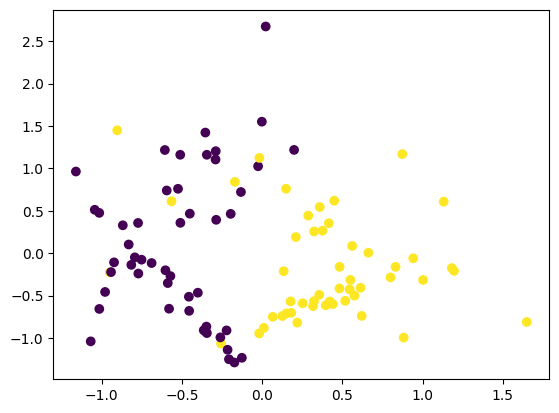

In [3]:
# Code given in the question
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)

# For plotting
plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
train_data_len = 0.7*len(X)
X_train = pd.DataFrame(X[:int(train_data_len)])
y_train = pd.Series(y[:int(train_data_len)])
X_test = pd.DataFrame(X[int(train_data_len):])
y_test = pd.Series(y[int(train_data_len):])

In [5]:
print("Train data length: ", len(X_train))
print("Test data length: ", len(X_test))

Train data length:  70
Test data length:  30


In [6]:
Tree = DecisionTree(criterion='gini_index')
Tree.fit(X_train, y_train)

In [17]:
y_pred = Tree.predict(X_test)
accuracy_ = accuracy(y_test, y_pred)
print("Accuracy of the model:", accuracy_, "\n")
print("Precision for Class 0:", precision(y_pred, y_test, 0))
print("Recall for Class 0:", recall(y_pred, y_test, 0),"\n")
print("Precision for Class 1:", precision(y_pred, y_test, 1))
print("Recall for Class 1:", recall(y_pred, y_test, 1),"\n")

Accuracy of the model: 0.8666666666666667 

Precision for Class 0: 0.9
Recall for Class 0: 0.75 

Precision for Class 1: 0.85
Recall for Class 1: 0.9444444444444444 



## 5 Fold Cross-Validation

In [25]:
max_depth = [1,2,3,4,5,6,7,8,9,10]
k=5
accuracies = []
trees = []
for depth in max_depth:
    fold_size = int(len(X)/k)
    for i in range(k):
        test_start = i * fold_size
        test_end = (i + 1) * fold_size
        test_set = pd.DataFrame(X[test_start:test_end])
        test_labels = pd.Series(y[test_start:test_end])

        train_set = np.concatenate([X[:test_start], X[test_end:]])
        train_labels = np.concatenate([y[:test_start], y[test_end:]])
        train_set = pd.DataFrame(train_set)
        train_labels = pd.Series(train_labels)

        tree = DecisionTree(criterion='gini_index', max_depth=depth)
        tree.fit(train_set, train_labels)

        y_pred = tree.predict(test_set)
        accuracy_ = accuracy(test_labels, y_pred)
        accuracies.append((depth,i+1,accuracy_))
        trees.append(tree)

In [26]:
accuracies = pd.DataFrame(accuracies, columns=['Depth', 'Fold', 'val_Accuracy'])

In [27]:
accuracies

,Depth,Fold,val_Accuracy
0,1,1,0.90
1,1,2,0.85
2,1,3,0.90
3,1,4,0.85
4,1,5,0.95
5,2,1,0.90
6,2,2,0.95
7,2,3,0.90
8,2,4,0.85
9,2,5,0.95


<Axes: xlabel='Depth'>

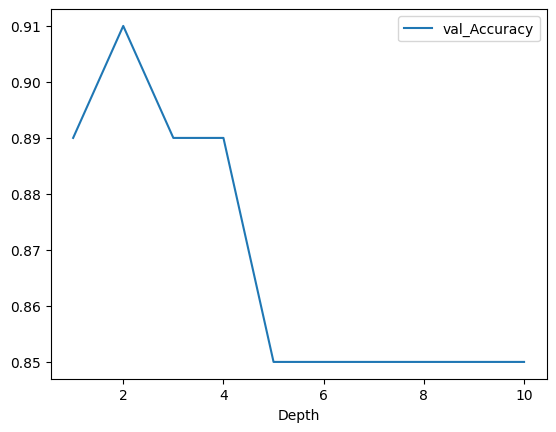

In [31]:
accuracies.groupby('Depth').mean().plot(y='val_Accuracy')

Therefore, the decision tree with depth 2 gives the highest accuracy of 91%.